# Financial Performance Analysis: 
## Apple, Microsoft, Tesla (3 - Year Summary: 2024, 2023, 2022)

## 1. Loading the data

In [3]:
# Importing pandas library
import pandas as pd

In [4]:
# Loading the csv file
df = pd.read_csv('company_financials.csv')

In [5]:
# Checking the first five rows
df.head()

,Company,Fiscal Year,Total Revenue (USD M),Net Income (USD M),Total Assets (USD M),Total Liabilities (USD M),Cash Flow from Operating Activities (USD M)
0,Microsoft,2024,245122,88136,512163,243686,118548
1,Microsoft,2023,211915,72361,411976,205753,87582
2,Microsoft,2022,198270,72738,364840,198298,89035
3,Tesla,2024,97690,7153,122070,48390,14923
4,Tesla,2023,96773,14974,106618,43009,13256


In [6]:
# Checking the datatypes
df.dtypes

Company                                        object
Fiscal Year                                     int64
Total Revenue (USD M)                           int64
Net Income (USD M)                              int64
Total Assets (USD M)                            int64
Total Liabilities (USD M)                       int64
Cash Flow from Operating Activities (USD M)     int64
dtype: object

### Data Transformation

In [8]:
# Converting the Financial Year column to string datatype
df['Fiscal Year'] = df['Fiscal Year'].astype(str)

In [9]:
df.dtypes

Company                                        object
Fiscal Year                                    object
Total Revenue (USD M)                           int64
Net Income (USD M)                              int64
Total Assets (USD M)                            int64
Total Liabilities (USD M)                       int64
Cash Flow from Operating Activities (USD M)     int64
dtype: object

## 2. Analysis

In [11]:
# Adding year-over-year growth columns
df['Revenue Growth (%)'] = round(df.groupby('Company')['Total Revenue (USD M)'].pct_change() * 100,1)

df['Net Income Growth (%)'] = round(df.groupby('Company')['Net Income (USD M)'].pct_change() * 100,1)

In [12]:
df.head()

,Company,Fiscal Year,Total Revenue (USD M),Net Income (USD M),Total Assets (USD M),Total Liabilities (USD M),Cash Flow from Operating Activities (USD M),Revenue Growth (%),Net Income Growth (%)
0,Microsoft,2024,245122,88136,512163,243686,118548,NaN,NaN
1,Microsoft,2023,211915,72361,411976,205753,87582,-13.5,-17.9
2,Microsoft,2022,198270,72738,364840,198298,89035,-6.4,0.5
3,Tesla,2024,97690,7153,122070,48390,14923,NaN,NaN
4,Tesla,2023,96773,14974,106618,43009,13256,-0.9,109.3


### Calculate Asset/Liability Ratios
Purpose: Assess each company's financial leverage and risk.

In [14]:
df['Asset_Liability_Ratio'] = round(df['Total Assets (USD M)'] / df['Total Liabilities (USD M)'],1)

In [15]:
df.head()

,Company,Fiscal Year,Total Revenue (USD M),Net Income (USD M),Total Assets (USD M),Total Liabilities (USD M),Cash Flow from Operating Activities (USD M),Revenue Growth (%),Net Income Growth (%),Asset_Liability_Ratio
0,Microsoft,2024,245122,88136,512163,243686,118548,NaN,NaN,2.1
1,Microsoft,2023,211915,72361,411976,205753,87582,-13.5,-17.9,2.0
2,Microsoft,2022,198270,72738,364840,198298,89035,-6.4,0.5,1.8
3,Tesla,2024,97690,7153,122070,48390,14923,NaN,NaN,2.5
4,Tesla,2023,96773,14974,106618,43009,13256,-0.9,109.3,2.5


### Compare cash flows year-over-year
Purpose: Track operational cash flow growth or volatility.

In [17]:
df['CashFlow_YoY_Change(%)'] = round(df.groupby('Company')['Cash Flow from Operating Activities (USD M)'].pct_change() * 100,1)

In [18]:
df

,Company,Fiscal Year,Total Revenue (USD M),Net Income (USD M),Total Assets (USD M),Total Liabilities (USD M),Cash Flow from Operating Activities (USD M),Revenue Growth (%),Net Income Growth (%),Asset_Liability_Ratio,CashFlow_YoY_Change(%)
0,Microsoft,2024,245122,88136,512163,243686,118548,NaN,NaN,2.1,NaN
1,Microsoft,2023,211915,72361,411976,205753,87582,-13.5,-17.9,2.0,-26.1
2,Microsoft,2022,198270,72738,364840,198298,89035,-6.4,0.5,1.8,1.7
3,Tesla,2024,97690,7153,122070,48390,14923,NaN,NaN,2.5,NaN
4,Tesla,2023,96773,14974,106618,43009,13256,-0.9,109.3,2.5,-11.2
5,Tesla,2022,81462,12587,82338,36440,14724,-15.8,-15.9,2.3,11.1
6,Apple,2024,391035,93736,364980,308030,118254,NaN,NaN,1.2,NaN
7,Apple,2023,383285,96995,352583,290437,110543,-2.0,3.5,1.2,-6.5
8,Apple,2022,394328,99803,352755,302083,122151,2.9,2.9,1.2,10.5


In [19]:
df.fillna(0, inplace=True)

In [20]:
df.head(3)

,Company,Fiscal Year,Total Revenue (USD M),Net Income (USD M),Total Assets (USD M),Total Liabilities (USD M),Cash Flow from Operating Activities (USD M),Revenue Growth (%),Net Income Growth (%),Asset_Liability_Ratio,CashFlow_YoY_Change(%)
0,Microsoft,2024,245122,88136,512163,243686,118548,0.0,0.0,2.1,0.0
1,Microsoft,2023,211915,72361,411976,205753,87582,-13.5,-17.9,2.0,-26.1
2,Microsoft,2022,198270,72738,364840,198298,89035,-6.4,0.5,1.8,1.7


In [21]:
df.to_csv('transformed_financial_data.csv', index=False)

### Create summary statistics by company
Purpose: Quickly compare key metrics for each company.

In [23]:
df.describe()

,Total Revenue (USD M),Net Income (USD M),Total Assets (USD M),Total Liabilities (USD M),Cash Flow from Operating Activities (USD M),Revenue Growth (%),Net Income Growth (%),Asset_Liability_Ratio,CashFlow_YoY_Change(%)
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,233320.000000,62053.666667,296702.555556,186236.222222,76557.333333,-3.966667,9.155556,1.866667,-2.277778
std,130006.968331,39095.864110,153240.424606,114506.220759,48272.769855,6.561821,38.383268,0.547723,11.393834
min,81462.000000,7153.000000,82338.000000,36440.000000,13256.000000,-15.800000,-17.900000,1.200000,-26.100000
25%,97690.000000,14974.000000,122070.000000,48390.000000,14923.000000,-6.400000,0.000000,1.200000,-6.500000
50%,211915.000000,72738.000000,352755.000000,205753.000000,89035.000000,-0.900000,0.000000,2.000000,0.000000
75%,383285.000000,93736.000000,364980.000000,290437.000000,118254.000000,0.000000,2.900000,2.300000,1.700000
max,394328.000000,99803.000000,512163.000000,308030.000000,122151.000000,2.900000,109.300000,2.500000,11.100000


In [24]:
summary = df.groupby('Company').agg({
    'Total Revenue (USD M)': ['mean', 'min', 'max'],
    'Net Income (USD M)': ['mean', 'min', 'max'],
    'Asset_Liability_Ratio': ['mean', 'min', 'max'],
    'Cash Flow from Operating Activities (USD M)': ['mean', 'min', 'max']}).round().astype(int)
display(summary)

Total Revenue (USD M)                 Net Income (USD M)         \
                           mean     min     max               mean    min   
Company                                                                     
Apple                    389549  383285  394328              96845  93736   
Microsoft                218436  198270  245122              77745  72361   
Tesla                     91975   81462   97690              11571   7153   

                 Asset_Liability_Ratio          \
             max                  mean min max   
Company                                          
Apple      99803                     1   1   1   
Microsoft  88136                     2   2   2   
Tesla      14974                     2   2   2   

          Cash Flow from Operating Activities (USD M)                  
                                                 mean     min     max  
Company                                                                
Apple                                          116983  110543  122151  
Microsoft                                       98388   87582  118548  
Tesla                                           14301   13256   14923

## 3. Visual Representations

In [26]:
# Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Total Revenue Over Time 
To compare how total revenue has changed for Microsoft, Tesla, and Apple from 2022 to 2024.

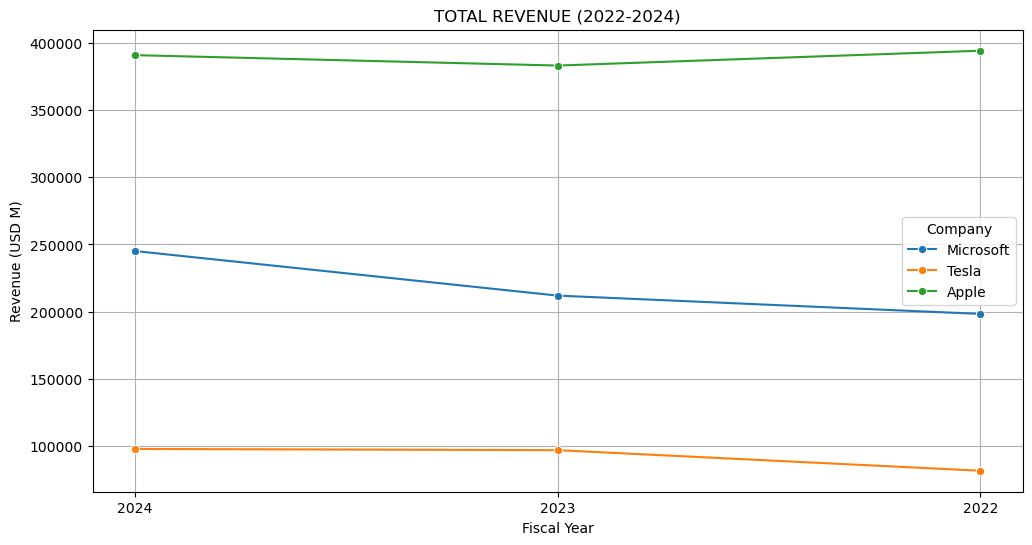

In [28]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df, x = 'Fiscal Year', y = 'Total Revenue (USD M)',
             hue = 'Company', marker = 'o')
plt.title('TOTAL REVENUE (2022-2024)')
plt.ylabel('Revenue (USD M)')
plt.grid(True)
plt.show()

The chart shows that Apple maintains the highest revenue, while Microsoft shows steady growth, and Tesla has slower, more modest gains.

###  Net Income Over Time
To visualize trends in net income across the three companies over the last three fiscal years.

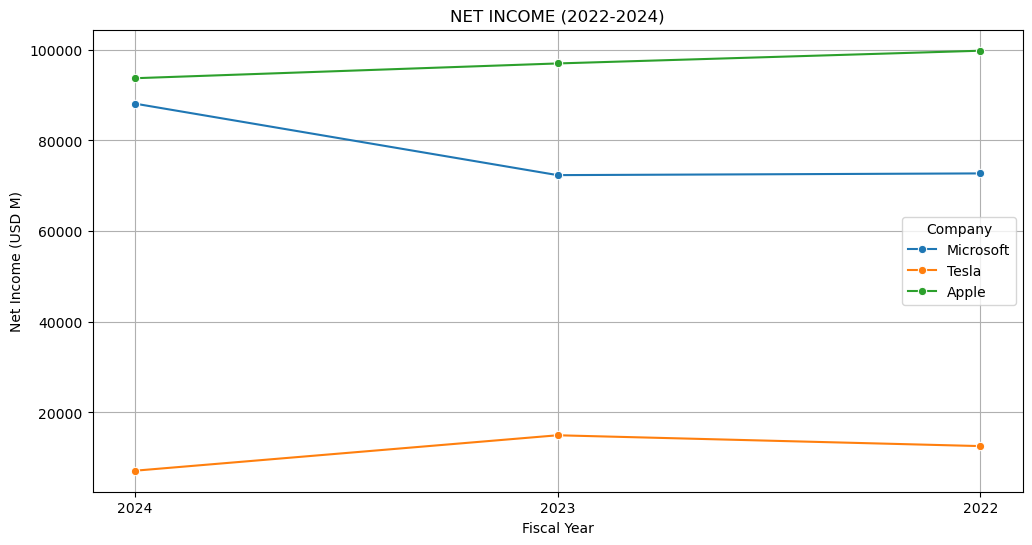

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Fiscal Year', y='Net Income (USD M)', 
             hue = 'Company', marker='o')
plt.title('NET INCOME (2022-2024)')
plt.grid(True)
plt.show()

Microsoft and Apple remain consistently profitable, while Tesla shows more fluctuation, with a noticeable spike in 2023.

### Asset-to-Liability Ratio
To compare the financial stability of companies by examining how well their assets cover their liabilities.

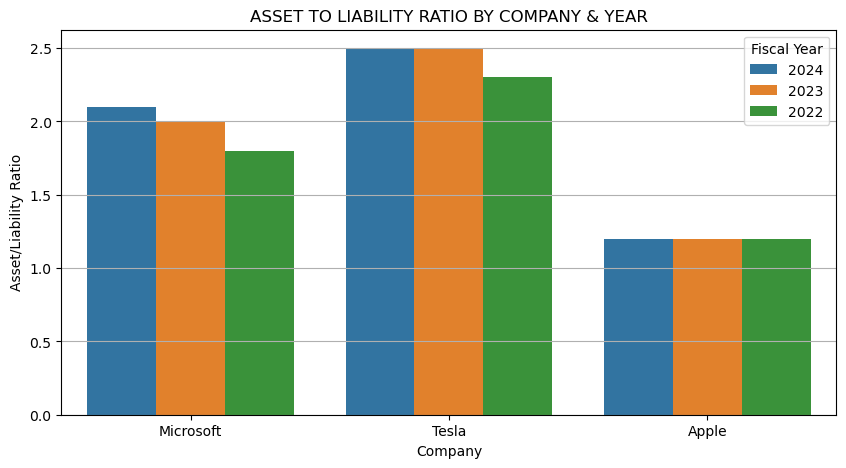

In [34]:
plt.figure(figsize = (10,5))
sns.barplot(data=df, x='Company', y='Asset_Liability_Ratio', hue='Fiscal Year')
plt.title('ASSET TO LIABILITY RATIO BY COMPANY & YEAR')
plt.ylabel('Asset/Liability Ratio')
plt.grid(axis='y')
plt.show()

Tesla has the strongest asset coverage, followed by Microsoft, while Apple has the lowest ratio, indicating higher relative debt.

### Revenue Growth Rate
To measure and compare how fast each company's revenue is increasing or decreasing.

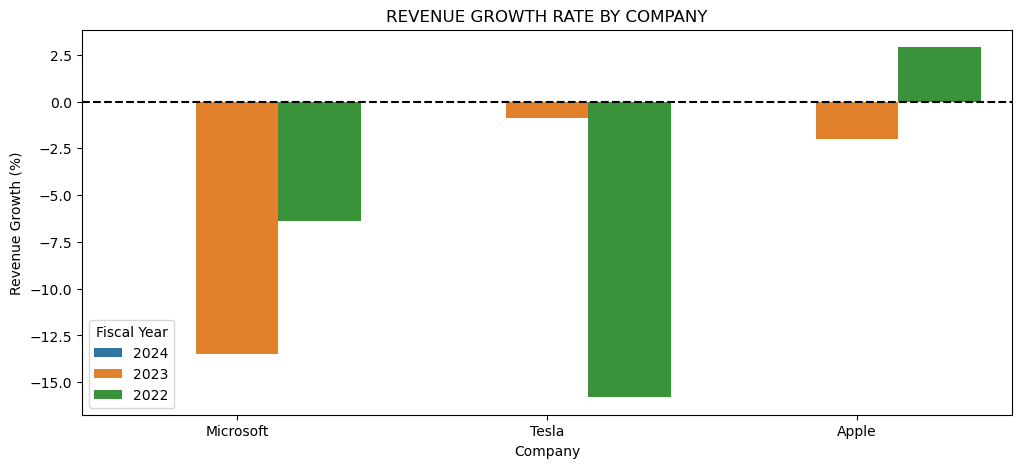

In [37]:
plt.figure(figsize=(12,5))
sns.barplot(data = df, x='Company', y = 'Revenue Growth (%)',
            hue = 'Fiscal Year')
plt.title('REVENUE GROWTH RATE BY COMPANY')
plt.axhline(0,color='black', linestyle='--')
plt.show()

Tesla and Microsoft experienced notable slowdowns in growth, while Apple remained relatively stable with minor fluctuations.

### Net Income Growth Rate
 To track how profit margins have changed year-over-year for each company.

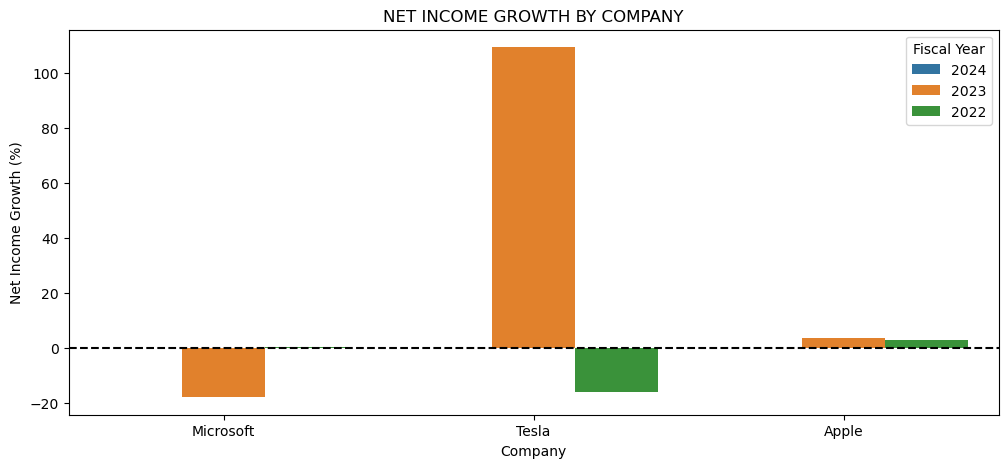

In [40]:
plt.figure(figsize=(12,5))
sns.barplot(data = df, x='Company', y = 'Net Income Growth (%)',
            hue = 'Fiscal Year')
plt.title('NET INCOME GROWTH BY COMPANY')
plt.axhline(0,color='black', linestyle='--')
plt.show()

Tesla had a huge profit jump in 2023, while Microsoft saw a dip that year, and Apple remained steady with slight positive growth. 

### Operating Cash Flow
To see how much cash each company generates from its core operations over time.

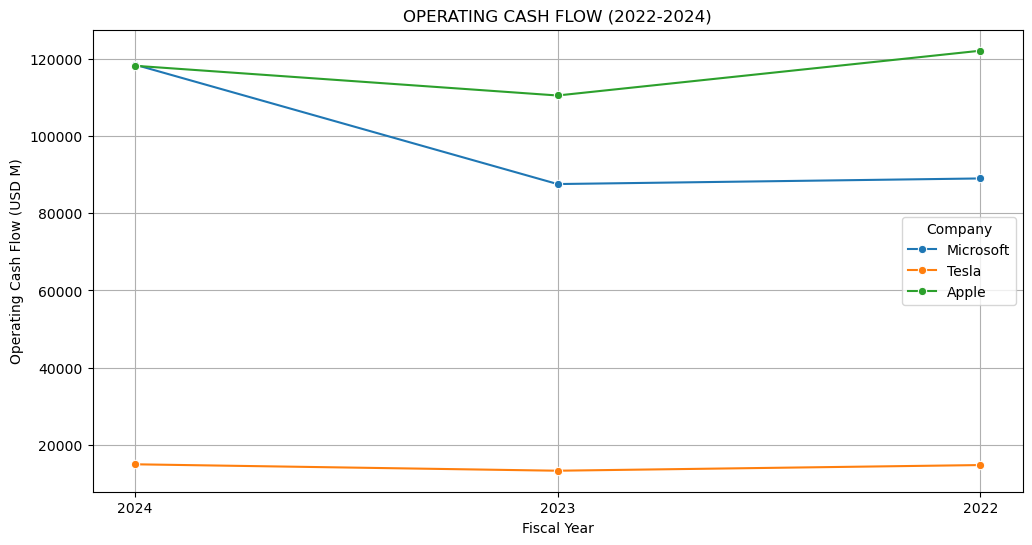

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Fiscal Year', y = 'Cash Flow from Operating Activities (USD M)', 
             hue = 'Company', marker='o')
plt.title('OPERATING CASH FLOW (2022-2024)')
plt.ylabel('Operating Cash Flow (USD M)')
plt.grid(True)
plt.show()

Apple leads in operational cash flow, with Microsoft close behind, while Tesla's cash flow is much lower and more inconsistent.

## Analysis and Insights
### 1. Microsoft
* `Revenue steadily increased form $198B (2022) to $245B (2024), with a dip in growth in 2023 (-6.4%) and a stronger recovery by 2024.`
* Net income decreased in 2023 (-17.9%), despite stable revenue, but showed a rebound in 2024 ($88B), indicating better cost management or product margins.
* Assets and liabilities both grew significantly, but Microsoft maintained a strong Asset-to-Liability Ratio (2.0+), reflecting financial stability.
* Operating cash flow dropped sharply in 2023 (-26.1%), possibly due to increased investment or operational expenses, tehn recovered strongly in 2024.

**Key Insight:** Despite a temporary slowdown in 2023, Microsoft showed strong recovery in 2024 with improved income and cash flow. The company maintains robust asset coverage for its liabilities, supporting long-term stability.

### 2. Tesla
* `Revenue grew from $81B (2022) to ~$97B (2024), though growth slowed significantly after 2022 (-15.8% in 2022, -0.9% in 2023).`
* Net income saw a massive spike in 2023 (+109.3%) despite flat revenue, suggesting significant cost optimization or extraordinary gains.
* Assets and liabilities continued to increase steadily, and Tesla maintains the highest Asset-to-Liability Ratio (~2.5) among the three companies.
* Cash flow from operations fluctuated, with a decline in 2023 (-11.2%) after growth in 2022 (+11.1%), suggesting volatility in operational cash generation.

**Key Insight:** Tesla shows high financial leverage and strong asset backing, but volatile profit and cash flow patterns raise questions about sustainability. 2023 was a standout year for net income, possibly from one-time efficiency gains.

## 3. Apple
* `Revenue remained high but showed a slight decline from $394B (2022) to $391B (2024), with a -2% drop in 2023 and mild recovery in 2024.`
* Net income followed a similar trend, peaking in 2022 and slightly decreasing afterward. However, the changes were marginal, indicating stable profitability.
* Assets and liabilities have grown in parallel, but Apple has the lowest Asset-to-Liability Ratio (1.2), meaning a relatively higher leverage position.
* Operating cash flow declined in 2023 (-6.5%) after a positive year in 2022 (+10.5%), before slightly improving in 2024.

**Key Insight:** Apple remains highly profitable and consistent, though its leverage is higher compared to peers. Despite slight revenue and cash flow declines, it maintains strong operational efficiency.

##  Cross-Company Observations (2022–2024)
* Microsoft has strong and steady cash flow and a solid financial position, meaning it earns well and manages its assets and debts carefully.
* Tesla shows quick growth and big profit jumps at times, but its financial results go up and down a lot, making it less predictable.
* Apple continues to make high revenue consistently, but it takes on more debt compared to the value of its assets.